<a href="https://colab.research.google.com/github/leandroboteon/linear-regression-sales-forecast/blob/main/Regressao_para_MKT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Construção de um Modelo de Regressão para Avaliação de Investimentos em Marketing**


### Descrição do Projeto

Neste projeto, utilizando dados de uma empresa fictícia, nosso objetivo é desenvolver um modelo de regressão para estimar as vendas com base nos investimentos realizados em plataformas de publicidade online, como YouTube, Facebook e jornais.

Após o tratamento dos outliers, analisaremos de forma mais precisa a relação entre os investimentos em marketing e as vendas geradas. Isso resultará na criação de um modelo preditivo refinado, que oferecerá insights estratégicos para otimizar o retorno sobre o investimento.

## **Análise Descritiva**

Nesta etapa, foram utilizadas as bibliotecas Pandas, Numpy, Matplotlib e Seaborn para importação e manipulação de dados, realização de análises estatísticas e visualização de dados.

In [211]:
# importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [212]:
# importando o dataframe
df = pd.read_csv("/content/drive/MyDrive/Formação em Dados/Desafio 04/MKT.csv", sep=",")

In [213]:
df.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [214]:
# verificando o tipo dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [215]:
df.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


## **Análise Exploratória**

Nesta etapa, foram utilizadas técnicas de visualização de dados e análises estatísticas para identificar possíveis correlações entre as variáveis.

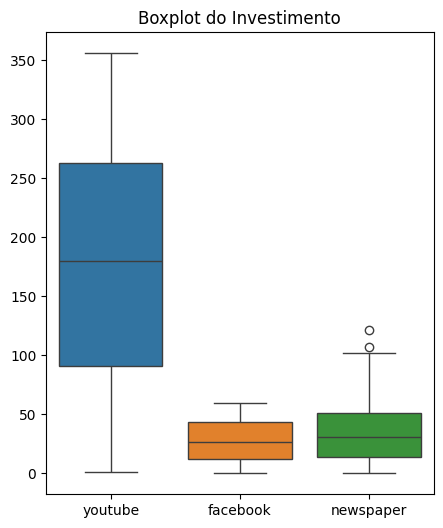

In [216]:
# boxplot para observar outliers

plt.figure(figsize=(5,6))
sns.boxplot(data=df[["youtube", "facebook", "newspaper"]])
plt.title("Boxplot do Investimento")
plt.show()

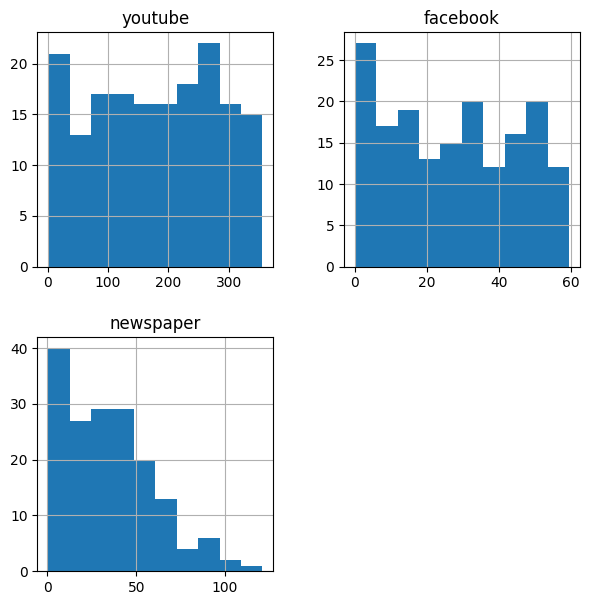

In [217]:
# histograma para observar distribuição dos investimentos nas 3 plataformas

df[["youtube", "facebook", "newspaper"]].hist(figsize=(7,7))
plt.show()

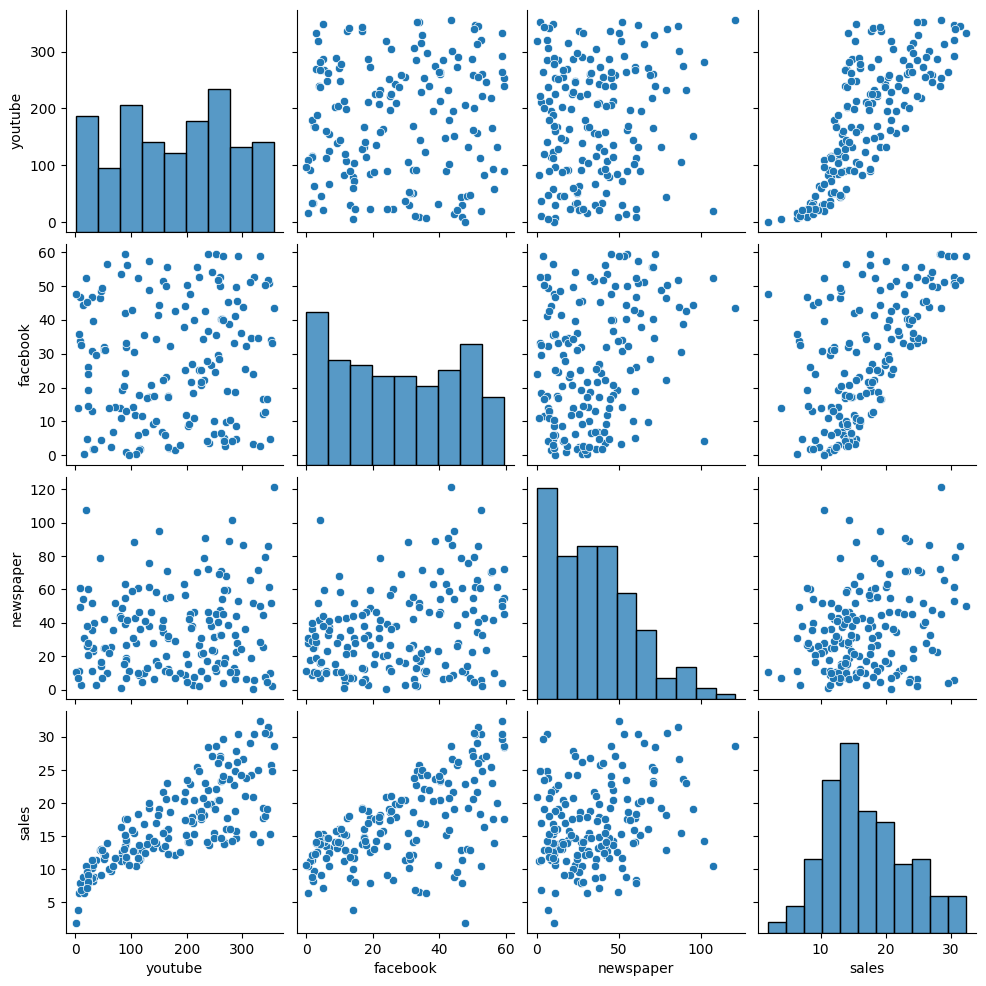

In [218]:
# observar as relações entre as variáveis
sns.pairplot(df)
plt.show()

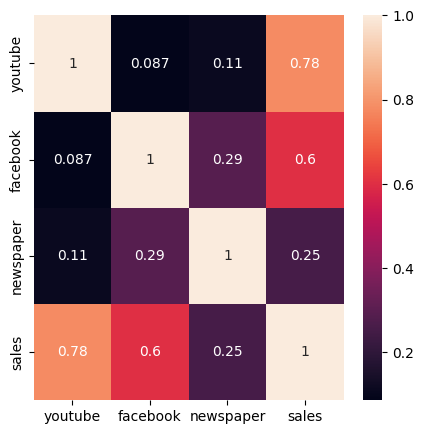

In [219]:
# heatmap de correlacão entre as variáveis
correlacao = df.corr()

plt.figure(figsize=(5,5))
sns.heatmap(correlacao, annot=True)
plt.show()

## **Identificação e Tratamento de Outliers**
Analisando o boxplot, identificamos outliers nos investimentos em *newspaper*. Assim, nesta fase, optamos por aplicar o método IQR para detectar e corrigir esses valores discrepantes, uma vez que os dados não seguem uma distribuição normal, como evidenciado pelo histograma.

### Identificação pelo método IQR

In [220]:
# Calcular Q1 e Q3
Q1 = df['newspaper'].quantile(0.25)
Q3 = df['newspaper'].quantile(0.75)

# Calcular o IQR
IQR = Q3 - Q1

# Calcular os limites para identificar os outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

In [221]:
# Identificar os outliers
outliers = df[(df['newspaper'] < limite_inferior) | (df['newspaper'] > limite_superior)]

# Exibir os resultados
print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")
print(f"Limite inferior: {limite_inferior}")
print(f"Limite superior: {limite_superior}")
print("Outliers na coluna 'newspaper':")
print(outliers)

Q1: 13.739999999999998
Q3: 50.879999999999995
IQR: 37.14
Limite inferior: -41.97
Limite superior: 106.59
Outliers na coluna 'newspaper':
    youtube  facebook  newspaper  sales
46    20.28     52.44     107.28  10.44
72   355.68     43.56     121.08  28.56


### Tratamento

In [222]:
# Remover os outliers
df = df[(df['newspaper'] >= limite_inferior) & (df['newspaper'] <= limite_superior)]

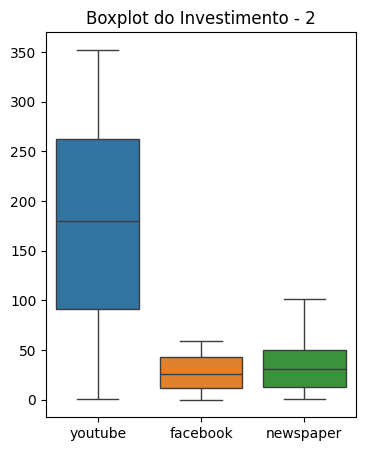

In [223]:
# boxplot_2 para observar a distribuição dos dados após a remoção dos outliers

plt.figure(figsize=(4,5))
sns.boxplot(data=df[["youtube", "facebook", "newspaper"]])
plt.title("Boxplot do Investimento - 2")
plt.show()

## **Modelagem**
Nesta etapa, buscou-se treinar o modelo de regressão linear para, em seguida, avaliar o seu desempenho.

In [224]:
# importanto a bibioteca para treinar o modelo de regressão linear
from sklearn.model_selection import train_test_split

# setando features e target
X = df[["youtube", "facebook", "newspaper"]]
Y = df["sales"]

In [225]:
# dividindo os dados em 70% treinamento e 30% teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=42)

In [226]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(118, 3)
(51, 3)
(118,)
(51,)


In [227]:
# importando biblioteca para realizar a regressão
from sklearn.linear_model import LinearRegression

# definindo a variável do modelo
lm = LinearRegression()

# treinando
lm.fit(X_train, Y_train)

LinearRegression()

In [228]:
# predições
Y_pred = lm.predict(X_test)

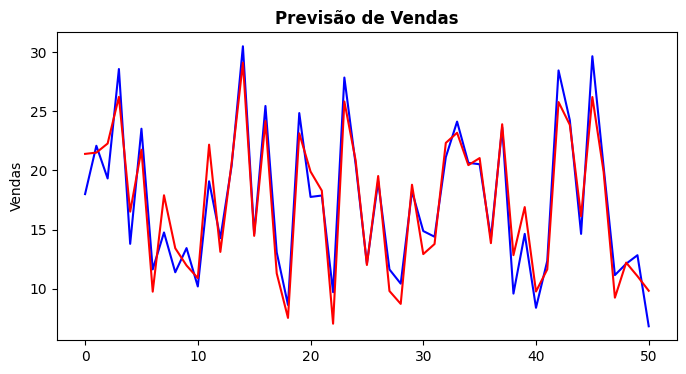

In [229]:
# comparando valores reais vs valores de predições
plt.figure(figsize=(8,4))
plt.plot(Y_test.values, color="blue")
plt.plot(Y_pred, color="red")
plt.title("Previsão de Vendas", fontweight="bold")
plt.ylabel("Vendas")
plt.show()

## **Calculando predição**
Nesta etapa, o modelo treinado foi utilizado para prever o valor de vendas com base em novos dados de entrada.

In [230]:
# importando biblioteca para aplicar o r²
from sklearn.metrics import r2_score

# calculando o r²
r = r2_score(Y_test, Y_pred)

print("r_quadrado: ", r)

r_quadrado:  0.9139240672215202


In [231]:
# predições com alguns valores do df
resultado = pd.DataFrame({"Real": Y_test, "Predição": Y_pred}).head()
display(resultado)

,Real,Predição
140,18.00,21.394441
30,22.08,21.503149
121,19.32,22.270655
29,28.56,26.206731
145,13.80,16.517290


In [232]:
# predição com valores de entrada para as features (com a possibilidade de aplicar um input)
youtube = 20   # float(input("Investimento Yt: "))
facebook = 10   # float(input("Investimento Fb: "))
newspaper	= 5  # float(input("Investimento Np: "))

entrada = [[youtube,facebook,newspaper]];

In [233]:
# visualização do resultado
lm.predict(entrada)[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


6.2154824448396635

## **Conclusão**
Neste projeto, exploramos dados de investimentos em marketing com o objetivo de construir um modelo de regressão linear para prever o valor de vendas.

- Identificamos uma forte correlação entre a variável youtube e o target sales, indicando que investimentos nesta plataforma têm um impacto positivo nas vendas.

- Durante a análise, identificamos outliers nos investimentos em newspaper que afetaram o desempenho do modelo de regressão linear. Realizamos o tratamento adequado, removendo esses outliers para melhorar a precisão das previsões.

- A métrica R-quadrado apresentou um valor próximo de 1, o que sugere que o modelo tem uma boa capacidade de explicar a variabilidade dos dados de vendas com base nos investimentos em marketing.

- Ao observar o gráfico de valores testados versus valores previstos, notamos que o modelo geralmente consegue prever com precisão os valores, porém, há oportunidades para aprimoramento. Recomenda-se a análise de outras métricas de desempenho além do R-quadrado para uma avaliação mais abrangente da eficácia do modelo.